In [14]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 140

mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.markeredgecolor"] = "k"
mpl.rcParams["lines.markeredgewidth"] = 0.1
mpl.rcParams["figure.dpi"] = 130
from matplotlib import rc
rc('font', family='serif')
#rc('text', usetex=True)
rc('xtick', labelsize='x-small')
rc('ytick', labelsize='x-small')

## 1.Trajectory on z

Text(0.5, 1.0, 'Trajectory')

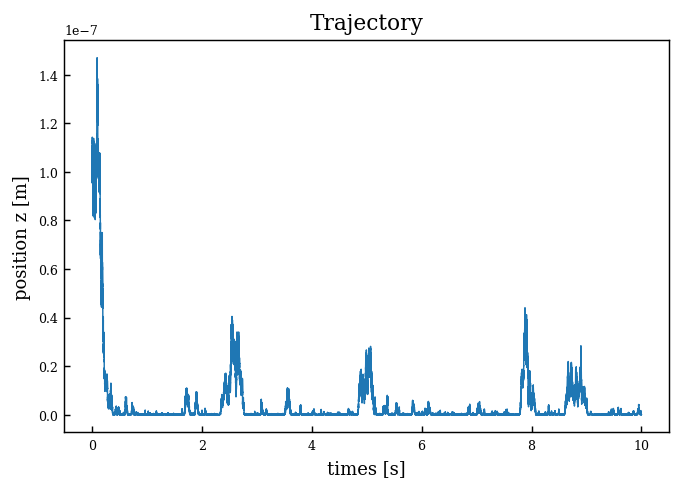

In [19]:
trajectory = np.load("tajectoire_rigid_wall_inert_dt1e-6_Nt10000000_R1p5e-6_rho2500.npy", "r")

x = trajectory[0]
y = trajectory[1]
z = trajectory[2]

R = 1.5e-6
dt = 1e-6
Nt = 10000000
rho = 2500
m = rho * (4 / 3) * np.pi * R ** 3

t = np.arange(Nt) * dt

plt.plot(t, z, linewidth=0.8)
plt.xlabel("times [s]")
plt.ylabel("position z [m]")
plt.title("Trajectory")

## 2.PDF of z

In [61]:
axis = "z"
bins = 10000

g = 9.81 
T = 300
kb = 1.38e-23
rhoF = 1000
delta_m = (4 / 3) * np.pi * R ** 3 * (rho - rhoF)
lD = 70e-9
lB = (kb * T) / (delta_m * g)

hist, bin_edges = np.histogram(z[z < 0.1e-8], bins=bins, density=True)
binsPosition = (bin_edges[:-1] + bin_edges[1:]) / 2
pdf = hist * 1/np.trapz(hist,binsPosition)

pdf_theo_brut = np.exp( -(4) * np.exp(- binsPosition/lD) - binsPosition/lB)
pdf_theo = pdf_theo_brut * 1/np.trapz(pdf_theo_brut,binsPosition) # normalised

In [62]:
max(binsPosition)

9.999482877449238e-10

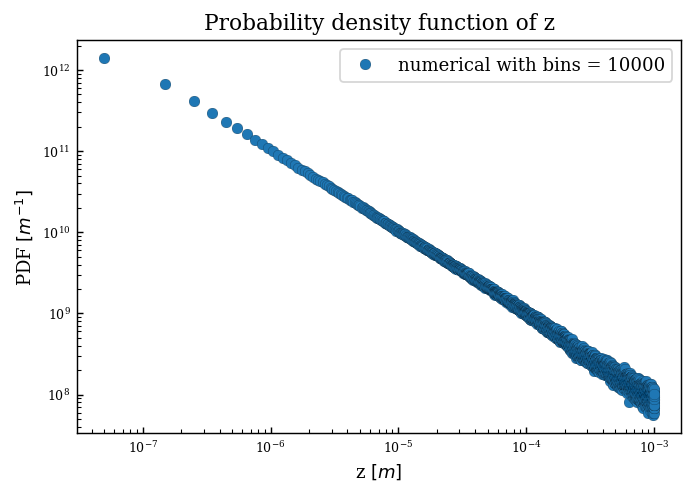

In [64]:
plt.loglog(binsPosition*1e6,pdf, "o", label="numerical with bins = " + str(bins))
#plt.plot(binsPosition, pdf_theo, "-", label="theory")

plt.title("Probability density function of " + axis)
plt.xlabel(axis + " $[m]$")
plt.ylabel("PDF $[m^{-1}]$")
#plt.ticklabel_format(axis="x", style="sci", scilimits=(0, 0))
plt.legend()

## 3.MSDz 

In [27]:
list_dt_MSD = np.array([], dtype=np.int)
for i in range(len(str(Nt)) - 1):
    # Take just 10 points by decade.
    list_dt_MSD = np.concatenate((list_dt_MSD, np.arange(10 ** i, 10 ** (i + 1), 10 ** i, dtype=np.int)))
    

NumberOfMSDPoint = len(list_dt_MSD)
MSD = np.zeros(NumberOfMSDPoint)
for n, i in enumerate(list_dt_MSD):
    if i == 0:
        MSD[n] = 0
        continue
    MSD[n] = np.mean((z[i:] - z[0:-i]) ** 2)

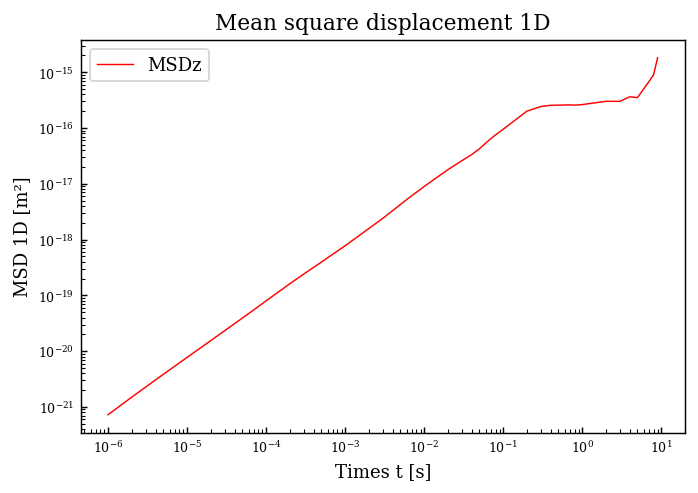

In [28]:
plt.loglog(t[list_dt_MSD], MSD, color="red", linewidth=0.8, label="MSDz")
plt.xlabel("Times t [s]")
plt.ylabel("MSD 1D [m²]")
plt.title("Mean square displacement 1D")
plt.legend()
plt.show()